 First we need to import some basic packages:

In [73]:
import pandas as pd
import numpy as np
import datetime
import re
import statsmodels.formula.api as smf
#This will be useful in plotting some graphs.
%matplotlib inline
import matplotlib.pyplot as plt

We found our data from *NYC open data* website. It's a dataframe about the inspection of the restaurants in NYC.

In [3]:
restaurant = pd.read_csv('~/Documents/Study/Data Bootcamp/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

## Data cleaning

 First let's have a look at our dataframe:

In [4]:
restaurant 

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40931972,88 PALACE RESTAURANT,MANHATTAN,88,EAST BROADWAY,10002.0,2129418886,Chinese,03/04/2016,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,8.0,A,03/04/2016,11/26/2018,Cycle Inspection / Initial Inspection
1,50003390,NEW GOLDEN STAR RESTAURANT,BROOKLYN,638,BLAKE AVE,11207.0,7184987534,Chinese,02/23/2017,No violations were recorded at the time of thi...,20D,Choking first aid poster not posted. Alcohol...,Not Critical,NaN,NaN,NaN,11/26/2018,Administrative Miscellaneous / Initial Inspection
2,40698807,MAMA MIA 44 SW,MANHATTAN,621,9 AVENUE,10036.0,2123154582,Italian,04/25/2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,04/25/2018,11/26/2018,Cycle Inspection / Initial Inspection
3,41348161,DELICATESSEN MACBAR,MANHATTAN,54,PRINCE STREET,10012.0,2122260211,American,09/27/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,A,09/27/2018,11/26/2018,Cycle Inspection / Re-inspection
4,41594717,AUNTIE ANNE'S PRETZELS,BROOKLYN,625,ATLANTIC AVENUE,11217.0,7183984390,Nuts/Confectionary,04/11/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,9.0,A,04/11/2016,11/26/2018,Cycle Inspection / Re-inspection
5,41491905,HILL COUNTRY CHICKEN,MANHATTAN,1123,BROADWAY,10010.0,6466881061,Chicken,06/11/2018,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,18.0,NaN,NaN,11/26/2018,Cycle Inspection / Initial Inspection
6,50004809,BAR BACON,MANHATTAN,836,9TH AVE,10019.0,6463620622,American,06/28/2017,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,19.0,B,06/28/2017,11/26/2018,Cycle Inspection / Re-inspection
7,50033575,JACQUES TORRES ICE CREAM,MANHATTAN,89,E 42 ST,10017.0,2129837353,"Ice Cream, Gelato, Yogurt, Ices",07/06/2017,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,B,07/06/2017,11/26/2018,Cycle Inspection / Re-inspection
8,50017223,FAIRFIELD INN & SUITES NEW YORK MANHATTAN FINA...,MANHATTAN,161,FRONT ST,10038.0,2128260001,Continental,03/18/2015,Violations were cited in the following area(s).,05D,Hand washing facility not provided in or near ...,Critical,38.0,NaN,NaN,11/26/2018,Pre-permit (Non-operational) / Initial Inspection
9,50013014,BE JUICE,MANHATTAN,93,3RD AVE,10003.0,2124886586,"Juice, Smoothies, Fruit Salads",07/20/2018,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,50.0,C,07/20/2018,11/26/2018,Cycle Inspection / Re-inspection


All of those column names are capitalized, some column names' meaning are hard to tell. so we should make some changes in the column names to make them more readable and clear. For future convenience, we are going to use lower case of those column names.

In [4]:
#create a list with all the column names.
list1=restaurant.columns
#turn all column names into lower case.
for i in list1:
    restaurant=restaurant.rename(columns={i:i.lower()})
#replace some column names to make them more understandable.
restaurant=restaurant.rename(columns={'dba':'name','cuisine description':'type'})

Since this is the inspection data of different restaurants, some restaurants have multiple data on different dates. If we apply this data directly in to our analysis, there would be potential errors.<br> For example, when analyzing the relationship between inspection scores and boroughs, too many inspections of the same restaurants with relatively higher scores would lead to an overestimation of the average score within a borough. <br>Therefore, we want to create a new dataframe, where very single restaurant only appears once, with the average scores of different restaurants. <br>In addition, as we hope to concentrate on recent trends, all the inspection data we choose are after 1/1/2015.

In [5]:
#drop the rows with no grade date and score.
restaurant2=restaurant.dropna(subset=['grade date','score'])
#select those rows with inspection date later than 2015/1/1
restaurant2['grade date'] = pd.to_datetime(restaurant2['grade date'])  
mask = (restaurant2['grade date'] > '2015-1-1')
restaurant2=restaurant2.loc[mask]
#drop the irrelavent columns to make the rows of the same restaurant exactly the same.
restaurant3=restaurant2.drop(['inspection date','action','violation code',
                              'violation description','critical flag','grade',
                              'grade date','record date','inspection type','score'],axis=1)
#create a dataframe with only the average score of every restaurant.
camis_agg = restaurant2.groupby('camis').agg({'score':np.mean})
#drop the duplicates.
restaurant4=restaurant3.drop_duplicates(subset=['camis'], keep='first')
#merge and create the new dataframe
rescombo = pd.merge(restaurant4,camis_agg,on='camis')
rescombo = rescombo.rename(columns={'score':'avg_score'})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Good job!<br>
Now let's take a look at the DataFrame we have after cleaning:

In [5]:
rescombo

,camis,name,boro,building,street,zipcode,phone,type,avg_score
0,40931972,88 PALACE RESTAURANT,MANHATTAN,88,EAST BROADWAY,10002.0,2129418886,Chinese,10.833333
1,40698807,MAMA MIA 44 SW,MANHATTAN,621,9 AVENUE,10036.0,2123154582,Italian,13.416667
2,41348161,DELICATESSEN MACBAR,MANHATTAN,54,PRINCE STREET,10012.0,2122260211,American,9.636364
3,41594717,AUNTIE ANNE'S PRETZELS,BROOKLYN,625,ATLANTIC AVENUE,11217.0,7183984390,Nuts/Confectionary,6.500000
4,50004809,BAR BACON,MANHATTAN,836,9TH AVE,10019.0,6463620622,American,11.500000
5,50033575,JACQUES TORRES ICE CREAM,MANHATTAN,89,E 42 ST,10017.0,2129837353,"Ice Cream, Gelato, Yogurt, Ices",14.625000
6,50013014,BE JUICE,MANHATTAN,93,3RD AVE,10003.0,2124886586,"Juice, Smoothies, Fruit Salads",28.166667
7,40401002,JOHNNY MACK'S BAR,BROOKLYN,1114,8 AVENUE,11215.0,7188327961,American,10.428571
8,50042162,MILE 17,MANHATTAN,1446,1ST AVE,10021.0,2127721734,American,10.333333
9,50060617,POQUITO PICANT,BROOKLYN,497,ATLANTIC AVE,11217.0,7182461700,Mexican,22.375000


Now we have a dataframe with only one row for each restaurant, and the score is the average of all inspections. But there is no column for the us to know how they violated the regulations, so we still need a dataframe to include that.<br>We decided to use the column 'violation code', but we don't want to go too deep into different violation codes. According to the explanation of these codes we found online(https://www1.nyc.gov/assets/doh/downloads/pdf/rii/blue-book.pdf), just by the numbers in the violation codes, we could have a basic idea of what kind of violation it is. For example, 02 means violation related to temperature, and 03 means violation related to food quality. So we can just keep the numerical parts.

In [6]:
#some of the violation codes are NaN, so we need to drop those rows
restaurant2=restaurant2.dropna(subset=['violation code'])
#reset the index.
restaurant2 = restaurant2.reset_index(drop=True)
#create a new column with only the numerical part in violation codes.
list2=[]
for i in range(0,189506):
    list2.append(restaurant2['violation code'][i])
    list2[i]=list2[i][0:2]
restaurant2['violation type']=pd.Series(list2)
#delete the original column
restaurant2=restaurant2.drop(['violation code'],axis=1)
restaurant2=restaurant2.dropna(subset=['zipcode'])
restaurant2

,camis,name,boro,building,street,zipcode,phone,type,inspection date,action,violation description,critical flag,score,grade,grade date,record date,inspection type,violation type
0,40931972,88 PALACE RESTAURANT,MANHATTAN,88,EAST BROADWAY,10002.0,2129418886,Chinese,03/04/2016,Violations were cited in the following area(s).,Pesticide use not in accordance with label or ...,Not Critical,8.0,A,2016-03-04,11/26/2018,Cycle Inspection / Initial Inspection,08
1,40698807,MAMA MIA 44 SW,MANHATTAN,621,9 AVENUE,10036.0,2123154582,Italian,04/25/2018,Violations were cited in the following area(s).,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-04-25,11/26/2018,Cycle Inspection / Initial Inspection,06
2,41348161,DELICATESSEN MACBAR,MANHATTAN,54,PRINCE STREET,10012.0,2122260211,American,09/27/2018,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,Not Critical,9.0,A,2018-09-27,11/26/2018,Cycle Inspection / Re-inspection,10
3,41594717,AUNTIE ANNE'S PRETZELS,BROOKLYN,625,ATLANTIC AVENUE,11217.0,7183984390,Nuts/Confectionary,04/11/2016,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,Critical,9.0,A,2016-04-11,11/26/2018,Cycle Inspection / Re-inspection,04
4,50004809,BAR BACON,MANHATTAN,836,9TH AVE,10019.0,6463620622,American,06/28/2017,Violations were cited in the following area(s).,Thawing procedures improper.,Not Critical,19.0,B,2017-06-28,11/26/2018,Cycle Inspection / Re-inspection,09
5,50033575,JACQUES TORRES ICE CREAM,MANHATTAN,89,E 42 ST,10017.0,2129837353,"Ice Cream, Gelato, Yogurt, Ices",07/06/2017,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,Critical,20.0,B,2017-07-06,11/26/2018,Cycle Inspection / Re-inspection,04
6,50013014,BE JUICE,MANHATTAN,93,3RD AVE,10003.0,2124886586,"Juice, Smoothies, Fruit Salads",07/20/2018,Violations were cited in the following area(s).,Food Protection Certificate not held by superv...,Critical,50.0,C,2018-07-20,11/26/2018,Cycle Inspection / Re-inspection,04
7,40401002,JOHNNY MACK'S BAR,BROOKLYN,1114,8 AVENUE,11215.0,7188327961,American,11/12/2016,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,2016-11-12,11/26/2018,Cycle Inspection / Initial Inspection,08
8,50042162,MILE 17,MANHATTAN,1446,1ST AVE,10021.0,2127721734,American,05/05/2017,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,Critical,11.0,A,2017-05-05,11/26/2018,Cycle Inspection / Re-inspection,04
9,50060617,POQUITO PICANT,BROOKLYN,497,ATLANTIC AVE,11217.0,7182461700,Mexican,09/13/2018,Violations were cited in the following area(s).,Evidence of rats or live rats present in facil...,Critical,25.0,B,2018-09-13,11/26/2018,Cycle Inspection / Re-inspection,04


Now we have 3 data frame<br>*restaurant* is the original dataframe with some simple modifications<br>*restaurant2* is the dataframe with only the inspection data after 2015-1-1, and the violation code replaced by violation type. <br>*rescombo* is the dataframe where each restaurant appears only once, and the score is the average score across all inspections.

## Behind the Scores

The most objective and clearest indicator of the food safety of a restaurant is its score. Thanks to NYC Health Department, around 24,0000 restaurants' food handling, food temperature, personal hygiene, facility and equipment maintenance and vermin control are all carefully inspected. Every violation is associated with a certain number of points, and the restaurant's inspection score is the total points at the end of the inspection. **The lower the score, the better.** According to the Health Department, restaurants with a score between **0 and 13 points earn an A**, those with **14 to 27 points receive a B** and those with **28 or more a C**. <br>
We are interested in where are the "good restaurants" (the restaurants with high food safety), and what makes a "good restaurant". Therefore, we want to explore the distribution and determination of the scores.

<br>First, we are going to have a look at the overall situation of NYC food safety.

In [7]:
print('Average score for all NYC restaurants:',rescombo['avg_score'].mean())
A = rescombo[(rescombo['avg_score'] <= 13)]
B = rescombo[(rescombo['avg_score'] >13) & (rescombo['avg_score'] <=27 )]
C = rescombo[(rescombo['avg_score'] >27)]
print("Number of Grade A restaurants:",A.shape[0])
print("Number of Grade B restaurants:",B.shape[0])
print("Number of Grade C restaurants:",C.shape[0])

Average score for all NYC restaurants: 11.255175874805406
Number of Grade A restaurants: 20447
Number of Grade B restaurants: 4359
Number of Grade C restaurants: 463


So, for all restaurants in NYC, the average score is 11.26, nearly 81% of the restaurants have an overall grade of A. The overall health level of NYC restaurant is pretty good.

### Which borough to eat in?

There are five boroughs in the New York City: Manhattan, Brooklyn, Queens, Bronx, and Staten Island. <br>
We want to explore the distribution of restaurant inspectin scores across boroughs, hoping to find some relationship between the food safety of a NYC restaurant and the borough in which it is located. 

From our perspective, the average score of the restaurants within a borough can best reflect the overall food safety level of that specific borough. Therefore, we group our data by borough, and take the mean of the scores. 

boro
Missing          11.000000
MANHATTAN        11.165765
QUEENS           11.213022
BROOKLYN         11.348740
BRONX            11.376621
STATEN ISLAND    11.564797
Name: avg_score, dtype: float64


(8, 12.143036454908392)

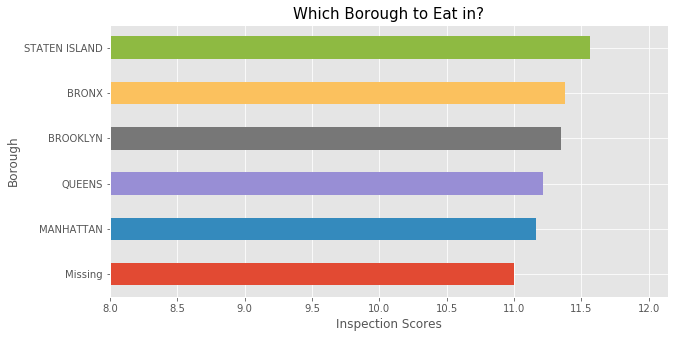

In [8]:
Score_by_boro = rescombo.groupby('boro')['avg_score'].mean()
print(Score_by_boro.sort_values())
#plot it so it will be more intuitive.
plt.style.use('ggplot')
fig, ax = plt.subplots()
Score_by_boro.sort_values().plot(kind='barh', ax=ax,figsize=(10,5))
ax.set_title('Which Borough to Eat in?', fontsize=15)
ax.set_xlabel('Inspection Scores')
ax.set_ylabel('Borough')
ax.set_xlim(xmin=8)

As is shown in the bar chart, overall food safety of the five boroughs are basically at the same level, with Staten Island having the highest score (which indicates more violations), and Manhattan having the lowest. However, the differences are just marginal.  <br>
Also, based on the grading system listed above, all of the five boroughs receive an A for their overall food safety performance, which is definitely a good news!

Well, it seems hard to find solid evidances supporting differences between boroughs with regard to food safety. <br>
We presume that this is because restaurants in these five boroughs of the New York City are basically competing in the same market, and supervised by the same authorities. These common factors contributes to there being no significant differences concerning food safety among New York restaurants.<br>
However, there are yet a lot more to explore ...

### Cuisine and food safety

What about the type of cuisine? Would the kind of food served by the restaurants have anything to do with food safety? That sounds an interesting aspect to probe into. <br>Before we start, let first take a look at how many cuisine types are there and how many restaurants each type have:

In [8]:
rescombo['type'].value_counts()

American                                                            5837
Chinese                                                             2375
CafÃ©/Coffee/Tea                                                    1677
Pizza                                                               1176
Italian                                                              979
Mexican                                                              916
Japanese                                                             849
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     812
Bakery                                                               717
Caribbean                                                            671
Spanish                                                              625
Donuts                                                               530
Pizza/Italian                                                        479
Chicken                                            

Well, there are a total of 85 different types of cuisines in our dataset, and that would be too much for us to cope with. Some of our cuisines only have a few restaurants around NYC, they wouldn't be representative. So we decided to delete those cuisines with less than 50 restaurants. 

In [9]:
#add a column with the number "1" to each data line for counting.
rescombo['count'] = 1
#create a dataframe that consist of the score and number for each type of restaurant.
type_agg = rescombo.groupby('type').agg({'avg_score':np.mean,'count':np.sum})
#sort out those types with more than 50 restaurants.(delete small samples)
type_agg = type_agg.loc[type_agg['count']>50,:]
#sort them by their average score, from small to big.
type_agg.sort_values(by=['avg_score'])

,avg_score,count
type,,
Donuts,8.640052,530
CafÃ©/Coffee/Tea,9.203118,1677
"Ice Cream, Gelato, Yogurt, Ices",9.273242,333
Sandwiches,9.397164,391
Sandwiches/Salads/Mixed Buffet,9.610423,239
Other,9.696453,226
Hamburgers,9.737953,376
Salads,9.816155,75
"Bottled beverages, including water, sodas, juices, etc.",9.991082,102


We've sorted them from according to the average score, from small to big (best performing to worst performing). Now we see, the best performing type of restaurants is the **Donuts**,with an average score of only 8.64, despite their huge inspection numbers. And the worst performing one is **Peruvian**, with a score of 14.65.<br> Let's have a closer look at those two types. <br><br> First let's look at donut types.

In [10]:
#create a subset of only "donuts" type restaurants.
donuts=rescombo[rescombo.type=='Donuts']
print(donuts['avg_score'].describe())
donuts['name'].value_counts()

count    530.000000
mean       8.640052
std        3.010243
min        0.000000
25%        6.892857
50%        8.700000
75%       10.276786
max       24.500000
Name: avg_score, dtype: float64


DUNKIN' DONUTS                            335
DUNKIN' DONUTS, BASKIN ROBBINS             86
DUNKIN DONUTS                              44
DUNKIN DONUTS & BASKIN ROBBINS              6
DUNKIN' DONUTS/ BASKIN ROBBINS              4
DUNKIN' DONUTS/BASKIN ROBBINS               4
DUNKIN DONUTS BASKIN ROBBINS                3
DUN-WELL DOUGHNUTS                          2
THE DOUGHNUT PROJECT                        2
TWIN DONUT                                  2
DOUGH                                       2
DOUGHNUTTERY                                2
COUNTRY DONUTS                              2
DOUGHNUT PLANT                              2
DUNKIN' DONUTS BASKIN ROBBINS               2
MIKE'S DONUTS                               1
DU'S DONUTS AND COFFEE                      1
DUNKIN' DONUTS-BASKIN ROBBINS               1
TAJ DONUT SHOP                              1
Dunkin Donuts                               1
DUNKIN DONUTS / BASKIN ROBBINS              1
Dunkin' Donuts/Baskin Robbins     

A lot of the these inspection datas are for Dunkin Donut. But their names are written in different ways. Let's try to gather them together and analyze them.

In [11]:
#create a dataframe for Dunkin Donuts
names=['DUNKIN','Dunkin']
dunkin=donuts[donuts['name'].str.contains('|'.join(names))]
print('Number of Dunkin Donuts:',dunkin.shape[0])
print('Deviation from the average donuts score:',dunkin['avg_score'].mean()-8.64)
print('Donkin Donuts score description:\n',dunkin['avg_score'].describe())
#create a dataframe without dunkin donuts
without_dun=donuts[~donuts.name.str.contains('DUNKIN')][~donuts.name.str.contains('Dunkin')]
print('Non-Donkin Donuts score description:\n',without_dun['avg_score'].describe())

Number of Dunkin Donuts: 505
Deviation from the average donuts score: -0.03011563793741523
Donkin Donuts score description:
 count    505.000000
mean       8.609884
std        2.990601
min        0.000000
25%        6.857143
50%        8.666667
75%       10.166667
max       24.500000
Name: avg_score, dtype: float64
Non-Donkin Donuts score description:
 count    25.000000
mean      9.249434
std       3.392404
min       2.500000
25%       7.222222
50%       9.875000
75%      11.285714
max      15.952381
Name: avg_score, dtype: float64


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Among the 530 donuts restaurants, more than **95%** are Dunkin Donuts. And their **average score (8.61) is significantly lower** than the average score of other donut restaurants(9.24).

In [12]:
#create a subset of only "Peruvian" type restaurants.
peru=rescombo[rescombo.type=='Peruvian']
print(peru['avg_score'].describe())
peru['name'].value_counts()

count    76.000000
mean     14.659722
std       8.126878
min       7.000000
25%      10.104167
50%      12.000000
75%      17.014706
max      64.777778
Name: avg_score, dtype: float64


DON ALEX RESTAURANT                      5
PIO PIO                                  4
EL POLLO INKA PERU                       2
RIKO                                     2
RIKO PERUVIAN CUISINE                    2
DON POLLO                                2
CONEY ISLAND TASTE                       1
CHIFA RESTAURANT                         1
PANCA                                    1
LOS NISPEROS PERUVIAN RESTAURANT         1
MISSION CEVICHE                          1
LA CABANA PERUANA                        1
LIMA PERUVIAN RESTAURANT                 1
RAYMI/LATIN BEET KITCHEN                 1
EL ANCLA DE ASTORIA RESTAURANT & BAR     1
4 Amores (Entrance is on Whitney Ave)    1
CUZCO PERUVIAN  RESTAURANT               1
PIO PIO BROOKLYN                         1
LIMA                                     1
LLAMITA                                  1
URUBAMBA                                 1
SOL INCA                                 1
COLONIA VERDE                            1
DESNUDA CEV

Unlike donuts, there isn't a very famous Peruvian restaurant that has many chained restaurants. so we are not going to keep digging into that.

Now we are going to look at the some major cuisines (more than 500 restaurants) in NYC.

Text(0,0.5,'Cuisine Type')

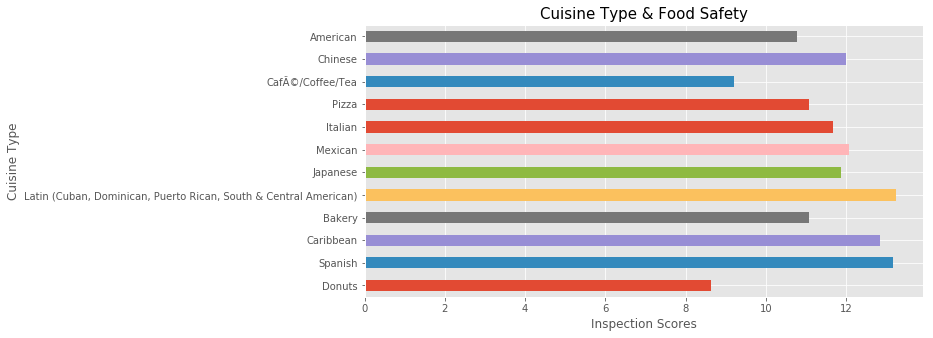

In [13]:
#selecting the cuisine types with more than 500 restaurants
Score_by_type = type_agg.loc[type_agg['count']>500,:]
Score_by_type=Score_by_type.sort_values(by=['count'],ascending=True)
#plot it out
plt.style.use('ggplot')
fig, ax = plt.subplots()
Score_by_type['avg_score'].plot(kind='barh', ax=ax,figsize=(10,5))
ax.set_title('Cuisine Type & Food Safety', fontsize=15)
ax.set_xlabel('Inspection Scores')
ax.set_ylabel('Cuisine Type')

We sort the cuisine types according to their restaurant numbers, from the most (American) to the least (Donuts), and there seems to be **no relationship between the number of restaurant and the average inspection score.** <br><br>
Among those major cuisines, the best perfoming one is still donuts, while the worst performing one is the Latin. only two types of major cuisines **(Latin & Spanish) have average score of more than 13 (Grade B)**, **Cafe and Donuts have significantly lower average scores** than other cuisines. <br><br>And based on those trends and numbers we had an assumption: the cuisine that takes a long procedure to make is more likely to have a higher score, a lower grade, while foods that can be made fairly quickly wouldn't have many chances to violate the food safety law.

## Behind the violation types

During the inspection of those restaurants, NYC Health Department have given different restaurants their violation codes to help consumers see what kind of inappropriate action those restaurants have made. In total, there are 99 different violation codes. But as mentioned before, we don't want to dig too deep into this. So we decided to use just the numerical part as indicators of what kind of violation it is.<br><br>Violation types could also tell us something interesting. First, let's have a look at the overall trend.

10    61879
06    41326
04    32414
08    21365
02    21063
09     6679
05     1183
03      335
22      266
07        6
17        1
19        1
Name: violation type, dtype: int64


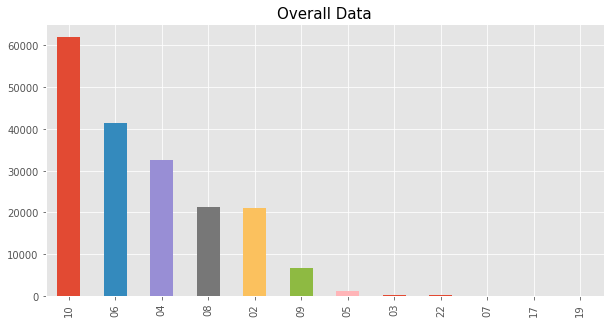

In [45]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
restaurant2['violation type'].value_counts().plot(kind='bar',ax=ax,figsize=(10,5))
ax.set_title('Overall Data',size=15)
print(restaurant2['violation type'].value_counts())

Overall, the violation code appeared most is 10 (environment), that is over 21000 violations more than the second most: 06 (workers), almost the size of the fourth and fifth violation code: 08 (pest) and 02 (temperature). <br>04(contamination of food) is worth noticing as well, more than 30000 times of violation. Apart from these, other violation codes are relatively small, with less than 10000 violations.

### Violation types and borough

In [15]:
#create 5 dataframe with different boroughs.
manhattan_type=restaurant2[restaurant2.boro=='MANHATTAN']
brooklyn_type=restaurant2[restaurant2.boro=='BROOKLYN']
bronx_type=restaurant2[restaurant2.boro=='BRONX']
queens_type=restaurant2[restaurant2.boro=='QUEENS']
sta_island_type=restaurant2[restaurant2.boro=='STATEN ISLAND']

#count_values on the violation code in different boroughs.
a=manhattan_type['violation type'].value_counts()
df_mht=pd.DataFrame([a]).transpose()
b=brooklyn_type['violation type'].value_counts()
df_bkl=pd.DataFrame([b]).transpose()
c=bronx_type['violation type'].value_counts()
df_brx=pd.DataFrame([c]).transpose()
d=queens_type['violation type'].value_counts()
df_qns=pd.DataFrame([d]).transpose()
e=sta_island_type['violation type'].value_counts()
df_sta=pd.DataFrame([e]).transpose()

#create a new column in those dataframes, including the fraction of each violation codes.
df_mht['manhattan']=df_mht['violation type']/np.sum(df_mht['violation type'],axis=0)
df_bkl['brooklyn']=df_bkl['violation type']/np.sum(df_bkl['violation type'],axis=0)
df_brx['bronx']=df_brx['violation type']/np.sum(df_brx['violation type'],axis=0)
df_qns['queens']=df_qns['violation type']/np.sum(df_qns['violation type'],axis=0)
df_sta['staten island']=df_sta['violation type']/np.sum(df_sta['violation type'],axis=0)

#turn the index into a new column, turn the type into integer.
df_mht['violation code']=df_mht.index.astype(str).astype(int)
df_bkl['violation code']=df_bkl.index.astype(str).astype(int)
df_brx['violation code']=df_brx.index.astype(str).astype(int)
df_qns['violation code']=df_qns.index.astype(str).astype(int)
df_sta['violation code']=df_sta.index.astype(str).astype(int)

#sort those dataframes based on violation code.
df_mht=df_mht.sort_values(by=['violation code'])
df_bkl=df_bkl.sort_values(by=['violation code'])
df_brx=df_brx.sort_values(by=['violation code'])
df_qns=df_qns.sort_values(by=['violation code'])
df_sta=df_sta.sort_values(by=['violation code'])

#merge those dataframe based on the violation code
vio_type=df_mht.merge(df_bkl,left_on='violation code', right_on='violation code', how='outer')
vio_type=vio_type.merge(df_brx,left_on='violation code', right_on='violation code', how='outer')
vio_type=vio_type.merge(df_qns,left_on='violation code', right_on='violation code', how='outer')
vio_type=vio_type.merge(df_sta,left_on='violation code', right_on='violation code', how='outer')

#drop the counts of violation type, just leave the fraction of them
vio_type=vio_type.drop(['violation type_x','violation type_y','violation type'],axis=1)
vio_type.fillna(0, inplace=True)
vio_type=vio_type.set_index('violation code')

In [16]:
vio_type

,manhattan,brooklyn,bronx,queens,staten island
violation code,,,,,
2,0.111469,0.114189,0.116778,0.111488,0.119723
3,0.001697,0.001903,0.001052,0.002165,0.001695
4,0.166993,0.182950,0.204463,0.165043,0.161479
5,0.005920,0.006994,0.005842,0.006636,0.005855
6,0.230650,0.207139,0.186938,0.232811,0.239599
7,0.000027,0.000086,0.000000,0.000000,0.000000
8,0.109337,0.123150,0.133427,0.109205,0.097072
9,0.033961,0.033921,0.029326,0.042849,0.041448
10,0.338167,0.327637,0.321650,0.329074,0.332820


Now we have our database, let's try to plot it out.

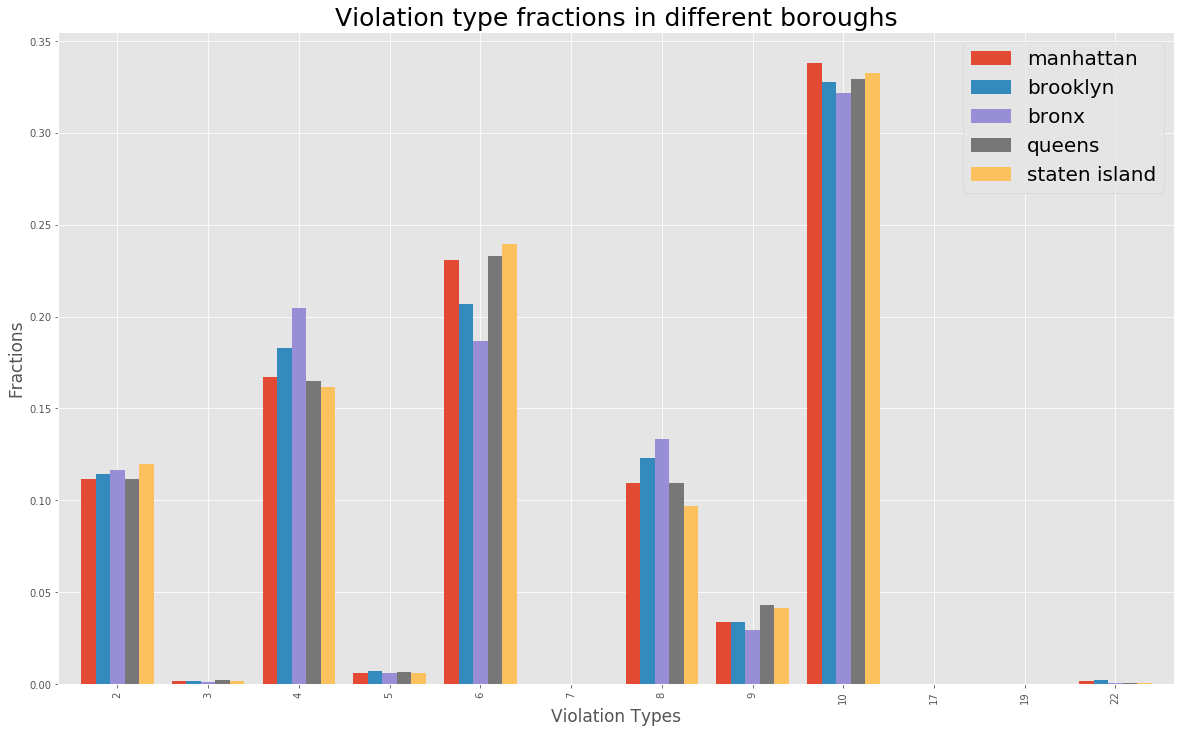

In [47]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
vio_type.plot(kind='bar', width=0.8,ax=ax,figsize=(20,12))
ax.set_title('Violation type fractions in different boroughs', fontsize=25)
ax.set_xlabel('Violation Types',fontsize=17)
ax.set_ylabel('Fractions',fontsize=17)
ax.legend(fontsize=20)

### Violation Type and Cuisine.

Will violation types have anything to do with the cuisine types? 
<br>Hypothetically, we think they are related. 
<br>For example, for Japanese restaurants, an important part of their food is sushi, thus it's less likely that they are going to violate rules with regards to temperature. Or, some Indian dishes might require a lot of manual work, while American restaurants and Cafe may just have a short cooking procedure. Thus Indian restaurants might have more violations towards workers.

<br>To justify those assumptions, we need to look at different cuisines individually. Of course we are not going to look at every single cuisine type. First let's have a look at the best performing one: donut, and the worst performing one:Peruvian.

Text(0,0.5,'fractions')

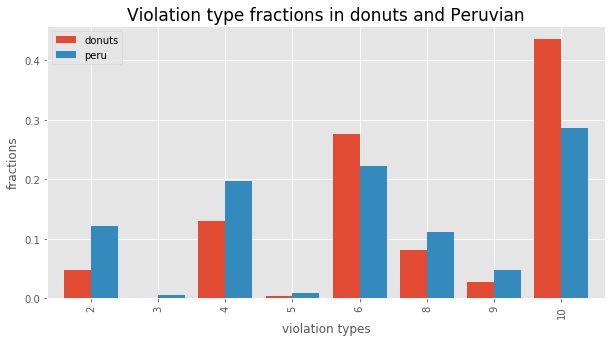

In [24]:
#create a dateframe for donuts.
donuts_type=restaurant2[restaurant2.type=='Donuts']
donuts_type=donuts_type['violation type'].value_counts()
df_donuts=pd.DataFrame([donuts_type]).transpose()
df_donuts['donuts']=df_donuts['violation type']/np.sum(df_donuts['violation type'],axis=0)
df_donuts['violation code']=df_donuts.index.astype(str).astype(int)
df_donuts=df_donuts.sort_values(by=['violation code'])

#create a dataframe for Peruvian
peru_type=restaurant2[restaurant2.type=='Peruvian']
peru_type=peru_type['violation type'].value_counts()
df_peru=pd.DataFrame([peru_type]).transpose()
df_peru['peru']=df_peru['violation type']/np.sum(df_peru['violation type'],axis=0)
df_peru['violation code']=df_peru.index.astype(str).astype(int)
df_peru=df_peru.sort_values(by=['violation code'])

#merge these two dataframes based on violation codes.
vio_cuisine_type=df_donuts.merge(df_peru,left_on='violation code', right_on='violation code', how='outer')
vio_cuisine_type=vio_cuisine_type.drop(['violation type_x','violation type_y'],axis=1)
vio_cuisine_type=vio_cuisine_type.set_index('violation code')

#plt.style.use('ggplot')
fig, ax = plt.subplots()
vio_cuisine_type.plot(kind='bar', width=0.8,ax=ax,figsize=(10,5))
ax.set_title('Violation type fractions in donuts and Peruvian', fontsize=17)
ax.set_xlabel('violation types')
ax.set_ylabel('fractions')

After looking at the best performing and worst performing one, let's look at some of the largest cuisines. We decided to look at the 4 cuisines with the largest number of restaurants: American(5837),Chinese(2375),Cafe(1677),and Pizza(1176).

In [25]:
#create a dataframe for American
american_type=restaurant2[restaurant2.type=='American']
american_type=american_type['violation type'].value_counts()
df_american=pd.DataFrame([american_type]).transpose()
df_american['American']=df_american['violation type']/np.sum(df_american['violation type'],axis=0)
df_american['violation code']=df_american.index.astype(str).astype(int)
df_american=df_american.sort_values(by=['violation code'])

#create a dataframe for Chinese
cn_type=restaurant2[restaurant2.type=='Chinese']
cn_type=cn_type['violation type'].value_counts()
df_cn=pd.DataFrame([cn_type]).transpose()
df_cn['Chinese']=df_cn['violation type']/np.sum(df_cn['violation type'],axis=0)
df_cn['violation code']=df_cn.index.astype(str).astype(int)
df_cn=df_cn.sort_values(by=['violation code'])

#create a dataframe for cafe
cafe_type=restaurant2[restaurant2.type=='CafÃ©/Coffee/Tea']
cafe_type=cafe_type['violation type'].value_counts()
df_cafe=pd.DataFrame([cafe_type]).transpose()
df_cafe['Cafe']=df_cafe['violation type']/np.sum(df_cafe['violation type'],axis=0)
df_cafe['violation code']=df_cafe.index.astype(str).astype(int)
df_cafe=df_cafe.sort_values(by=['violation code'])

#create a dataframe for pizza
pizza_type=restaurant2[restaurant2.type=='Pizza']
pizza_type=pizza_type['violation type'].value_counts()
df_pizza=pd.DataFrame([pizza_type]).transpose()
df_pizza['Pizza']=df_pizza['violation type']/np.sum(df_pizza['violation type'],axis=0)
df_pizza['violation code']=df_pizza.index.astype(str).astype(int)
df_pizza=df_pizza.sort_values(by=['violation code'])

#concatenate the dataframes together.
vio_cuisine_type1=df_american.merge(df_cn,left_on='violation code', right_on='violation code', how='outer')
vio_cuisine_type1=vio_cuisine_type1.merge(df_cafe,left_on='violation code', right_on='violation code', how='outer')
vio_cuisine_type1=vio_cuisine_type1.merge(df_pizza,left_on='violation code', right_on='violation code', how='outer')
vio_cuisine_type1=vio_cuisine_type1.drop(['violation type_x','violation type_y'],axis=1)
vio_cuisine_type1.fillna(0, inplace=True)
vio_cuisine_type1=vio_cuisine_type1.set_index('violation code')
vio_cuisine_type1

,American,Chinese,Cafe,Pizza
violation code,,,,
2,0.095865,0.144865,0.064281,0.135587
3,0.001438,0.002308,0.002217,0.000942
4,0.173055,0.151684,0.156956,0.184003
5,0.005058,0.006189,0.010450,0.007657
6,0.233705,0.234449,0.230526,0.182825
7,0.000024,0.000000,0.000000,0.000000
8,0.110080,0.108675,0.100486,0.128401
9,0.031619,0.053289,0.019105,0.027329
10,0.348244,0.297336,0.412603,0.333255


Text(0,0.5,'fractions')

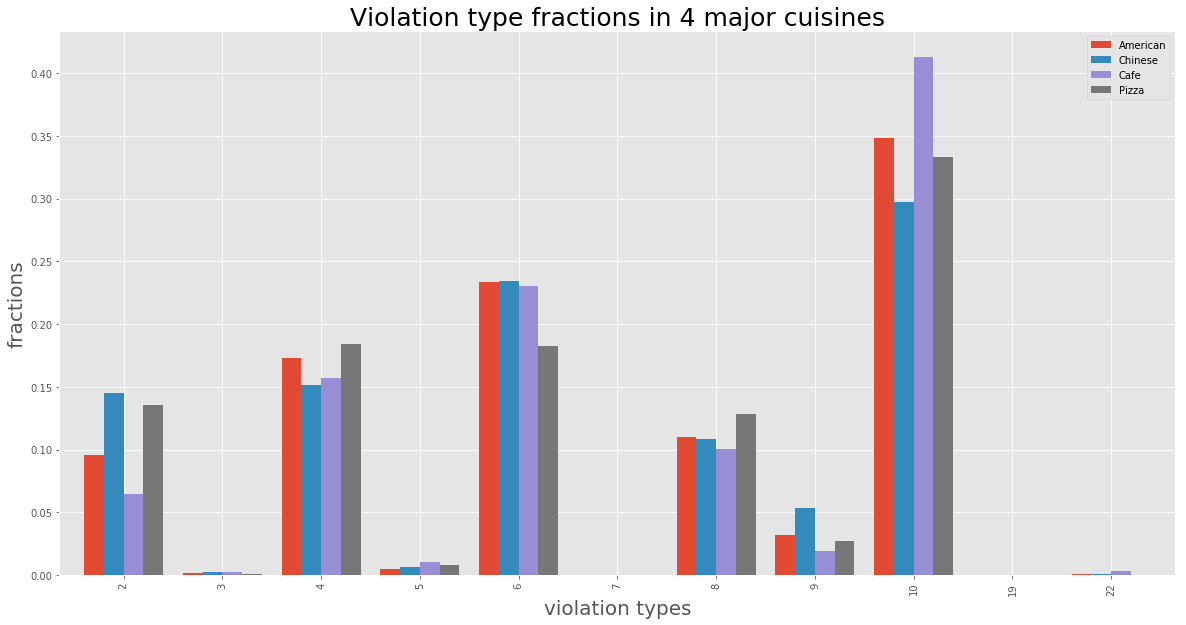

In [26]:
fig, ax = plt.subplots()
vio_cuisine_type1.plot(kind='bar', width=0.8,ax=ax,figsize=(20,10))
ax.set_title('Violation type fractions in 4 major cuisines', fontsize=25)
ax.set_xlabel('violation types',fontsize=20)
ax.set_ylabel('fractions',fontsize=20)

## Trends in restaurant scores

In [27]:
#find the 2015 inspection data
mask1 = (restaurant2['grade date'] < '2016-1-1')
restaurant2015=restaurant2.loc[mask1]
#drop the irrelavent columns to make the rows of the same restaurant exactly the same.
res2015=restaurant2015.drop(['inspection date','action','violation type',
                              'violation description','critical flag','grade',
                              'grade date','record date','inspection type','score'],axis=1)
#drop the duplicates.
res2015=res2015.drop_duplicates(subset=['camis'], keep='first')
#create a dataframe with only the average score of every restaurant.
res2015_agg = restaurant2015.groupby('camis').agg({'score':np.mean})
#merge and create a new dataframe for 2015
combo2015 = pd.merge(res2015,res2015_agg,on='camis',how='inner')
combo2015 = combo2015.rename(columns={'score':'score2015'})

#find the 2017 inspection data
mask2 = (restaurant2['grade date'] > '2017-1-1')&(restaurant2['grade date'] < '2018-1-1')
restaurant2017=restaurant2.loc[mask2]
#drop the irrelavent columns to make the rows of the same restaurant exactly the same.
res2017=restaurant2017.drop(['name','boro','building','street','zipcode','phone','type','inspection date','action','violation type',
                              'violation description','critical flag','grade',
                              'grade date','record date','inspection type','score'],axis=1)
#drop the duplicates.
res2017=res2017.drop_duplicates(subset=['camis'], keep='first')
#create a dataframe with only the average score of every restaurant.
res2017_agg = restaurant2017.groupby('camis').agg({'score':np.mean})
#merge and create a new dataframe for 2017
combo2017 = pd.merge(res2017,res2017_agg,on='camis',how='inner')
combo2017 = combo2017.rename(columns={'score':'score2017'})

#combine combo2015 and combo2017
combo1517 = pd.merge(combo2015,combo2017,on='camis',how='inner')

# Take the difference of the score in 2017 and score in 2015 for every single restaurant
combo1517['diff'] = combo1517['score2017'] - combo1517['score2015']
combo1517

,camis,name,boro,building,street,zipcode,phone,type,score2015,score2017,diff
0,40999668,DUNKIN' DONUTS/BASKIN ROBBINS,MANHATTAN,269,8 AVENUE,10011.0,6463968390,Donuts,10.000000,10.000000,0.000000
1,40388218,WALKER'S RESTAURANT,MANHATTAN,16,NORTH MOORE STREET,10013.0,2129410142,American,11.000000,7.000000,-4.000000
2,50003556,EASTERN RESTAURANT,BROOKLYN,1877,ROCKAWAY PKWY,11236.0,7182090649,Chinese,35.000000,12.000000,-23.000000
3,40367005,DA VINCI PIZZA,BROOKLYN,6514,18 AVENUE,11204.0,7182325855,Pizza/Italian,11.000000,18.000000,7.000000
4,50015640,LITTLE SKIPS OUTPOST,BROOKLYN,1158,MYRTLE AVE,11221.0,9292714311,CafÃ©/Coffee/Tea,8.666667,10.000000,1.333333
5,41676904,PINCH FOOD DESIGN,MANHATTAN,545,WEST 27 STREET,10001.0,2122447000,American,12.000000,11.000000,-1.000000
6,41257059,PANADERIA LA MIXTECA POBLANA & DELI,STATEN ISLAND,104,VICTORY BOULEVARD,10301.0,7187201221,Salads,18.750000,21.000000,2.250000
7,41388993,WESTVILLE,MANHATTAN,210,WEST 10 STREET,10014.0,2127417971,American,9.000000,10.000000,1.000000
8,41519860,LALLISSE,MANHATTAN,161,LEXINGTON AVENUE,10016.0,2126861352,Mediterranean,11.285714,13.000000,1.714286
9,41597839,KIDO SUSHI (QUEENS CENTER MALL),QUEENS,9015,QUEENS BOULEVARD,11373.0,7182713688,Japanese,12.000000,7.000000,-5.000000


## Which cuisine experiences the greatest progress over the years?

In [36]:
combo1517['type'].value_counts()

American                                                            1607
Chinese                                                              620
CafÃ©/Coffee/Tea                                                     357
Pizza                                                                352
Italian                                                              298
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     268
Mexican                                                              252
Bakery                                                               229
Japanese                                                             202
Caribbean                                                            189
Donuts                                                               189
Spanish                                                              158
Pizza/Italian                                                        156
Hamburgers                                         

In [37]:
#add a column with the number "1" to each data line for counting.
combo1517['count'] = 1
#create a dataframe that consist of the score difference and number for each type of restaurant.
type_agg = combo1517.groupby('type').agg({'diff':np.mean,'count':np.sum})
#sort out those types with more than 50 restaurants.(delete small samples)
type_agg = type_agg.loc[type_agg['count']>50,:]
#sort them by their average score, from small to big.
type_agg.sort_values(by=['diff'])

,diff,count
type,,
Korean,-1.441923,73
Indian,-0.993279,79
Hamburgers,-0.734007,139
Donuts,-0.693462,189
Thai,-0.689688,79
Chinese,-0.455369,620
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",-0.379562,268
Pizza/Italian,-0.367243,156
Pizza,-0.334125,352


Text(0,0.5,'Cuisine Type')

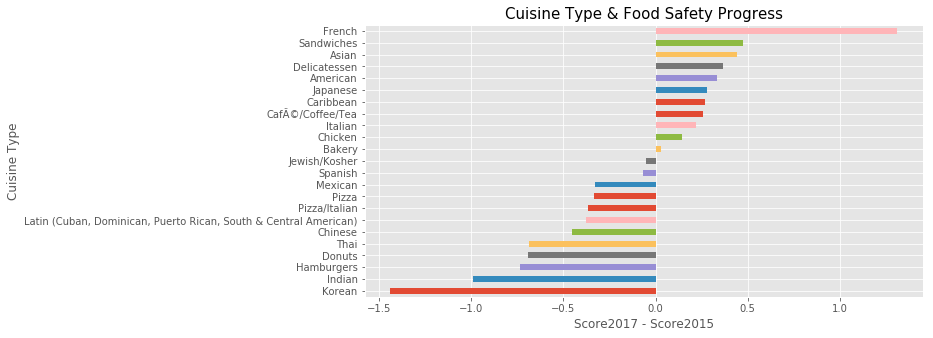

In [41]:
#selecting the cuisine types with more than 100 restaurants
Diff_by_type = type_agg.loc[type_agg['count']>70,:]
#plot it out
plt.style.use('ggplot')
fig, ax = plt.subplots()
Diff_by_type['diff'].sort_values().plot(kind='barh', ax=ax,figsize=(10,5))
ax.set_title('Cuisine Type & Food Safety Progress', fontsize=15)
ax.set_xlabel('Score2017 - Score2015')
ax.set_ylabel('Cuisine Type')

In [42]:
#create a subset of only "French" type restaurants.
french=combo2015[combo2015.type=='French']
print(french['score2015'].describe())

count    116.000000
mean       9.722024
std        5.285862
min        2.000000
25%        7.000000
50%        9.000000
75%       12.000000
max       38.000000
Name: score2015, dtype: float64


In [43]:
#create a subset of only "Korean" type restaurants.
korean=combo2015[combo2015.type=='Korean']
print(korean['score2015'].describe())

count    99.000000
mean     12.787142
std       7.561093
min       2.000000
25%       8.750000
50%      11.000000
75%      13.000000
max      48.000000
Name: score2015, dtype: float64


In [63]:
combo1517

,camis,name,boro,building,street,zipcode,phone,type,score2015,score2017,diff,count
0,40999668,DUNKIN' DONUTS/BASKIN ROBBINS,MANHATTAN,269,8 AVENUE,10011.0,6463968390,Donuts,10.000000,10.000000,0.000000,1
1,40388218,WALKER'S RESTAURANT,MANHATTAN,16,NORTH MOORE STREET,10013.0,2129410142,American,11.000000,7.000000,-4.000000,1
2,50003556,EASTERN RESTAURANT,BROOKLYN,1877,ROCKAWAY PKWY,11236.0,7182090649,Chinese,35.000000,12.000000,-23.000000,1
3,40367005,DA VINCI PIZZA,BROOKLYN,6514,18 AVENUE,11204.0,7182325855,Pizza/Italian,11.000000,18.000000,7.000000,1
4,50015640,LITTLE SKIPS OUTPOST,BROOKLYN,1158,MYRTLE AVE,11221.0,9292714311,CafÃ©/Coffee/Tea,8.666667,10.000000,1.333333,1
5,41676904,PINCH FOOD DESIGN,MANHATTAN,545,WEST 27 STREET,10001.0,2122447000,American,12.000000,11.000000,-1.000000,1
6,41257059,PANADERIA LA MIXTECA POBLANA & DELI,STATEN ISLAND,104,VICTORY BOULEVARD,10301.0,7187201221,Salads,18.750000,21.000000,2.250000,1
7,41388993,WESTVILLE,MANHATTAN,210,WEST 10 STREET,10014.0,2127417971,American,9.000000,10.000000,1.000000,1
8,41519860,LALLISSE,MANHATTAN,161,LEXINGTON AVENUE,10016.0,2126861352,Mediterranean,11.285714,13.000000,1.714286,1
9,41597839,KIDO SUSHI (QUEENS CENTER MALL),QUEENS,9015,QUEENS BOULEVARD,11373.0,7182713688,Japanese,12.000000,7.000000,-5.000000,1


Text(0,0.5,'Change in Socre')

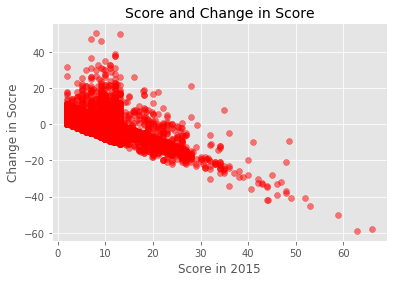

In [72]:
fig, ax = plt.subplots()
ax.scatter(combo1517['score2015'], combo1517['diff'], color='red',
            alpha=0.5)
ax.set_title('Score and Change in Score', fontsize=14)
ax.set_xlabel('Score in 2015')
ax.set_ylabel('Change in Socre')

In [75]:
print(smf.ols('diff ~ score2015',data=combo1517).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     5491.
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:50:39   Log-Likelihood:                -20743.
No. Observations:                6790   AIC:                         4.149e+04
Df Residuals:                    6788   BIC:                         4.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9223      0.136     65.722      0.0